## collection

In [8]:
import os
import cv2

In [9]:
DATA_DIR = './data'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

number_of_classes = 5 
dataset_size = 100

In [22]:
cap = cv2.VideoCapture(0)
for j in range(number_of_classes):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)
        counter += 1

In [23]:
cap.release()
cv2.destroyAllWindows()

## Create Dataset

In [8]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

In [9]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

In [10]:
DATA_DIR = './data'
data = []
labels = []

In [12]:
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))

            data.append(data_aux)
            labels.append(dir_)

<Axes: >

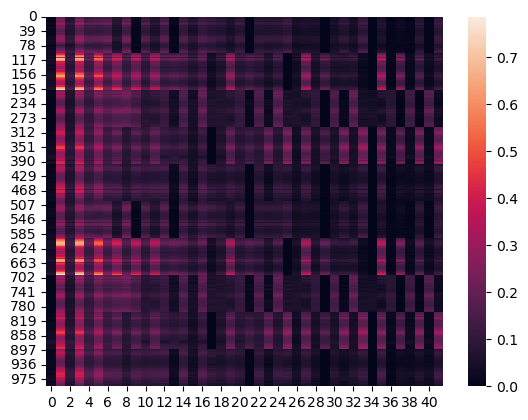

In [20]:
import seaborn as sns
sns. (data) 

In [28]:
f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

In [93]:
type(data_aux)

list

In [83]:
type(labels)

list

## Train

In [2]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [6]:
data.shape

(497, 42)

In [16]:
data[100:]

array([[0.02750602, 0.40707833, 0.09115621, ..., 0.09511676, 0.03001198,
        0.06062707],
       [0.02729312, 0.43062216, 0.09122851, ..., 0.1050607 , 0.03077692,
        0.06887591],
       [0.03041723, 0.51211868, 0.10506174, ..., 0.12038998, 0.03451341,
        0.07753961],
       ...,
       [0.02619866, 0.19942683, 0.06961221, ..., 0.03011942, 0.02556852,
        0.05885717],
       [0.02275532, 0.21398365, 0.06663758, ..., 0.03451014, 0.02478242,
        0.06398323],
       [0.02652618, 0.19464457, 0.06827188, ..., 0.02841526, 0.02422413,
        0.05558151]])

In [24]:
labels.shape

(497,)

In [25]:
labels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [26]:
model = RandomForestClassifier(n_estimators=100)

In [27]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_predict = model.predict(x_test)

In [29]:
score = accuracy_score(y_predict, y_test)

In [30]:
print('{}% of samples were classified correctly !'.format(score * 100))

100.0% of samples were classified correctly !


In [91]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [60]:
cm = confusion_matrix(y_predict, y_test)

In [44]:
print(cm)

[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 20  0]
 [ 0  0  0  0 20]]


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

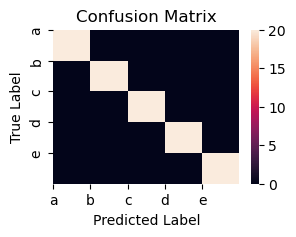

In [92]:
label_names = ['a', 'b', 'c','d','e']
plt.figure(figsize=(3,2))
sns.heatmap(cm)
plt.xticks(range(len(label_names)), label_names)
plt.yticks(range(len(label_names)), label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Class-wise Metrics')

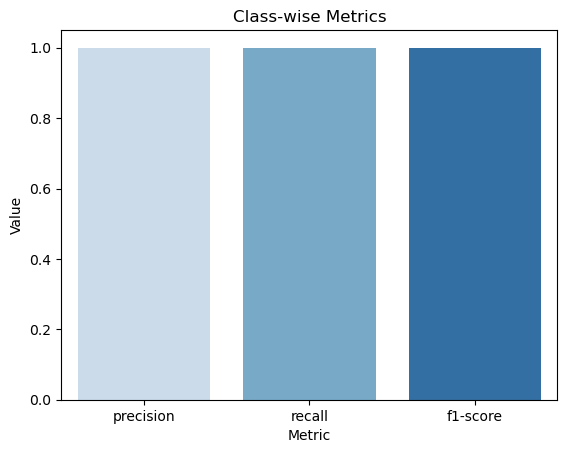

In [64]:
import pandas as pd
metrics_df = pd.DataFrame(report).iloc[:-1, :-1].T
sns.barplot(data=metrics_df, palette="Blues")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Class-wise Metrics")

In [20]:
f = open('model.p', 'wb')
pickle.dump({'model': model}, f)
f.close()

## Classification

In [39]:
import pickle
import cv2
import mediapipe as mp
import numpy as np

In [40]:
model_dict = pickle.load(open('./model.p', 'rb'))
model = model_dict['model']

In [41]:
cap = cv2.VideoCapture(0)

In [42]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3,max_num_hands=1)

In [43]:
labels_dict = {0: 'A', 1: 'B', 2: 'C',3:'D',4:'E'}

In [44]:
while True:
    data_aux = []
    x_ = []
    y_ = []
    ret, frame = cap.read()
    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))

        x1 = int(min(x_) * W) - 10
        y1 = int(min(y_) * H) - 10

        x2 = int(max(x_) * W) - 10
        y2 = int(max(y_) * H) - 10

        prediction = model.predict([np.asarray(data_aux)])

        predicted_character = labels_dict[int(prediction[0])]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
        cv2.putText(frame, predicted_character, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [7]:
cap.release()
cv2.destroyAllWindows()